In [12]:
import ccxt
import pandas as pd
from datetime import datetime, timedelta

# Function to fetch BTC/USDT price for the last 24 hours and convert it into a DataFrame
def fetch_btc_price():
    # Connect to Binance exchange
    exchange = ccxt.binance()

    # Get the current timestamp
    current_time = datetime.utcnow()
    # Calculate the timestamp for 24 hours ago
    past_time = current_time - timedelta(days=1)

    # Convert timestamps to milliseconds since the epoch
    since = int(past_time.timestamp() * 1000)

    # Fetch the OHLCV data for the last 24 hours, using a 1-hour interval
    ohlcv = exchange.fetch_ohlcv('BTC/USDT', timeframe='1h', since=since)

    # Convert the OHLCV data to a pandas DataFrame
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    
    # Convert the timestamp from milliseconds to a readable date format
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Set the timestamp as the DataFrame's index
    df.set_index('timestamp', inplace=True)

    return df

# Commenting out the function call to avoid execution in this context
df = fetch_btc_price()
df.head()




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2024-04-21 22:00:00 to 2024-04-23 05:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    32 non-null     float64
 1   high    32 non-null     float64
 2   low     32 non-null     float64
 3   close   32 non-null     float64
 4   volume  32 non-null     float64
dtypes: float64(5)
memory usage: 1.5 KB


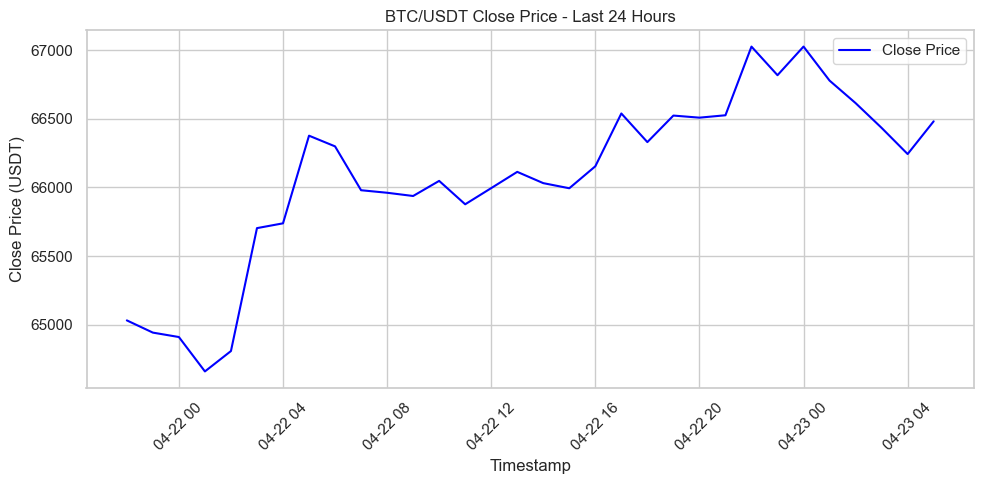

In [11]:
import matplotlib.pyplot as plt

# Function to plot BTC/USDT close prices using matplotlib
def plot_btc_price_matplotlib(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['close'], label='Close Price', color='blue')
    plt.title('BTC/USDT Close Price - Last 24 Hours')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price (USDT)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Commenting out the function call to avoid execution in this context
plot_btc_price_matplotlib(df)


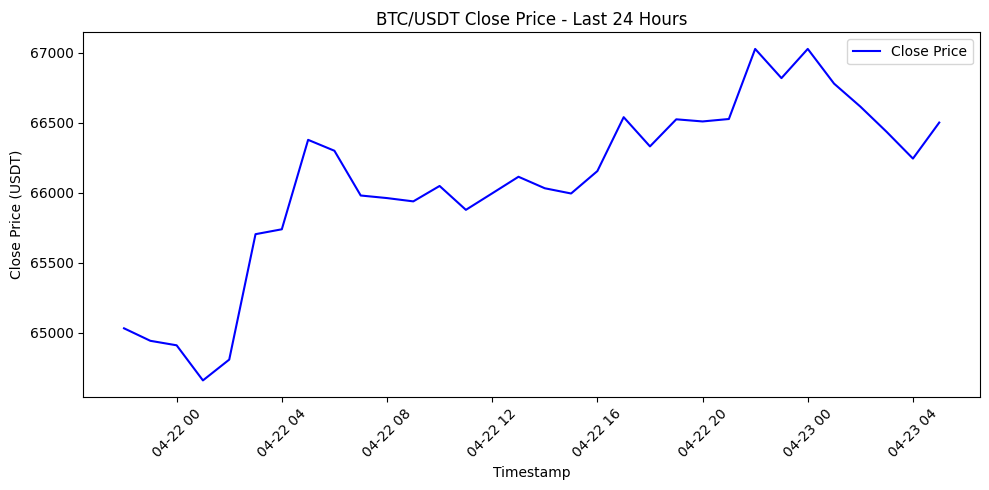

In [8]:
import ccxt
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.express as px

def fetch_btc_price():
    exchange = ccxt.binance()
    current_time = datetime.utcnow()
    past_time = current_time - timedelta(days=1)
    since = int(past_time.timestamp() * 1000)
    ohlcv = exchange.fetch_ohlcv('BTC/USDT', timeframe='1h', since=since)
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    return df

def plot_btc_price_matplotlib(df):
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['close'], label='Close Price', color='blue')
    plt.title('BTC/USDT Close Price - Last 24 Hours')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price (USDT)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_btc_price_plotly(df):
    fig = px.line(df, x=df.index, y='close', title='BTC/USDT Close Price - Last 24 Hours',
                  labels={'x': 'Timestamp', 'close': 'Close Price (USDT)'})
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

# Fetch data
df = fetch_btc_price()

# Plot with matplotlib
plot_btc_price_matplotlib(df)

# Plot with plotly
plot_btc_price_plotly(df)


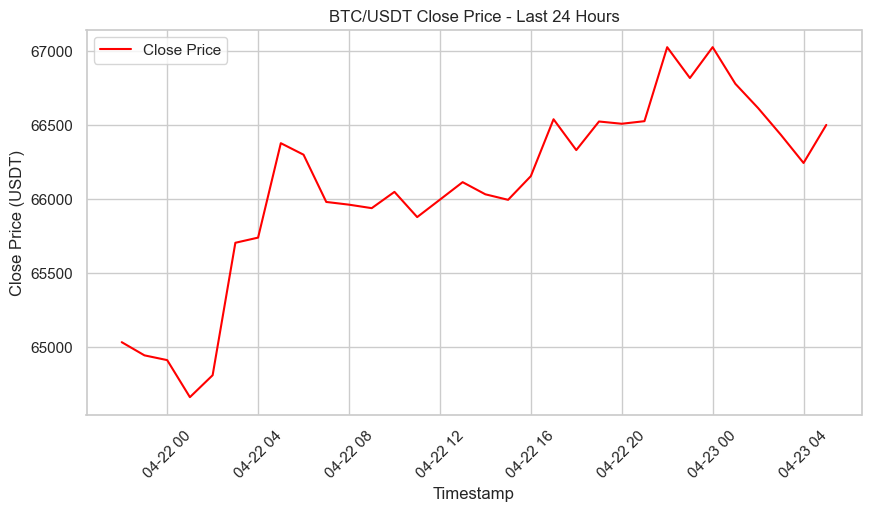

In [9]:
import seaborn as sns

# Function to plot BTC/USDT close prices using seaborn
def plot_btc_price_seaborn(df):
    plt.figure(figsize=(10, 5))
    sns.set_theme(style="whitegrid")
    sns.lineplot(data=df, x=df.index, y='close', color='red', label='Close Price')
    plt.title('BTC/USDT Close Price - Last 24 Hours')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price (USDT)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

# Commenting out the function call to avoid execution in this context
plot_btc_price_seaborn(df)


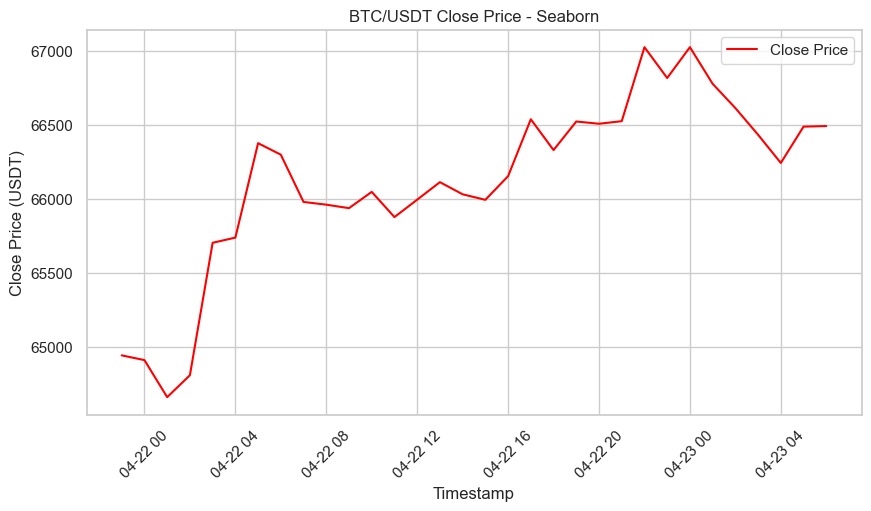

In [13]:
# Function to visualize BTC/USDT close prices using both seaborn and plotly
def visualize_btc_price(df):
    # Plot using seaborn
    plt.figure(figsize=(10, 5))
    sns.set_theme(style="whitegrid")
    sns.lineplot(data=df, x=df.index, y='close', color='red', label='Close Price')
    plt.title('BTC/USDT Close Price - Seaborn')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price (USDT)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Plot using plotly
    fig = px.line(df, x=df.index, y='close', title='BTC/USDT Close Price - Plotly',
                  labels={'x': 'Timestamp', 'close': 'Close Price (USDT)'})
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

# Commenting out the function call to avoid execution in this context
df = fetch_btc_price()
visualize_btc_price(df)


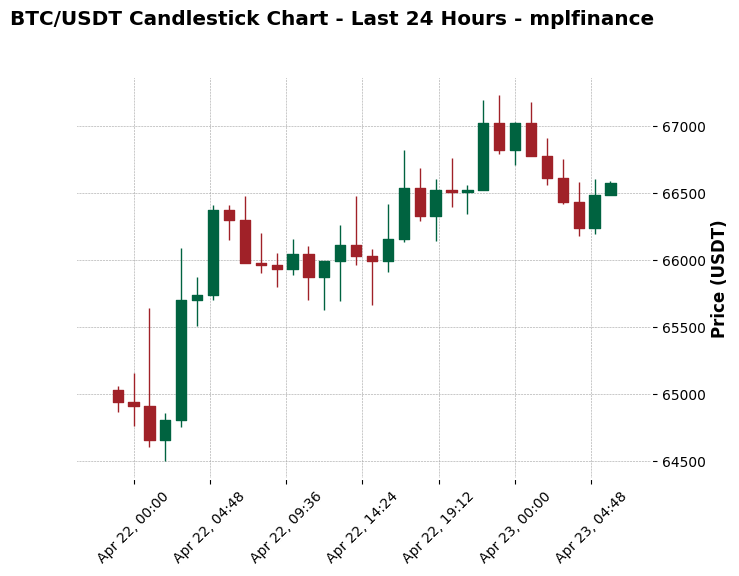

In [15]:
import ccxt
import pandas as pd
import plotly.graph_objects as go
import mplfinance as mpf
from datetime import datetime, timedelta

def fetch_btc_price():
    exchange = ccxt.binance()
    current_time = datetime.utcnow()
    past_time = current_time - timedelta(days=1)
    since = int(past_time.timestamp() * 1000)
    ohlcv = exchange.fetch_ohlcv('BTC/USDT', timeframe='1h', since=since)
    df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df.set_index('timestamp', inplace=True)
    return df

def plot_candlestick_plotly(df):
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                                         open=df['open'],
                                         high=df['high'],
                                         low=df['low'],
                                         close=df['close'])])
    fig.update_layout(title='BTC/USDT Candlestick Chart - Last 24 Hours - Plotly',
                      xaxis_title='Timestamp',
                      yaxis_title='Price (USDT)',
                      xaxis_rangeslider_visible=False)
    fig.show()

def plot_candlestick_mplfinance(df):
    df_plot = df.reset_index()
    mpf.plot(df_plot.set_index('timestamp'), type='candle', style='charles',
             title='BTC/USDT Candlestick Chart - Last 24 Hours - mplfinance',
             ylabel='Price (USDT)',
             volume=False,
             show_nontrading=True)

# Fetch data
df = fetch_btc_price()

# Visualize with Plotly
plot_candlestick_plotly(df)

# Visualize with mplfinance
plot_candlestick_mplfinance(df)
